In [1]:
import joblib
import pandas as pd
import numpy as np
import random
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, max_error, explained_variance_score



In [56]:
import joblib
import pandas as pd
import numpy as np
import random
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, max_error, explained_variance_score

# Initialize the DataFrame to collect results
df = pd.DataFrame(columns=[
    'Run', 'N_Estimators', 'Random Training State', 'Random RFR State', 'MSE', 'R^2', 'Adjusted R^2', 'MAE', 
    'MedAE', 'Maximum Error', 'Explained Variance', 'Mean Residual Difference', 'Sigma (Std of Residuals)', 
    'Residual Sum of Squares', 'Total Sum of Squares', 'Mean Squared Log Error', 'Mean Bias Deviation', 
    'Max Depth', 'Min Samples Split', 'Min Samples Leaf'
])

# Load the Random Forest model from the joblib file
model_path = 'RFRexp5-4-Monster/RUN_with11FEETS/random_forest_regressor.joblib'
rfr = joblib.load(model_path)

# Load your dataset (replace 'path_to_your_data.csv' with your actual dataset path)
data_path = 'TrainingSetundLOGG.csv'
data = pd.read_csv(data_path)

# Assume your dataset has a target column 'APOGEE_LOGG' and features in the remaining columns
features = data.drop(columns=['APOGEE_LOGG'])
target = data['APOGEE_LOGG']

# Create the preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Step 1: Impute missing values with mean
    ('scaling', StandardScaler()),  # Step 2: Standardize the features
    ('feature_selection', SelectKBest(score_func=f_regression, k=11)),  # Step 3: Select top 65 features
])

# Fit and transform the data using the pipeline
X_preprocessed = pipeline.fit_transform(features, target)

# Split data into training and test sets
randTrain = 8248  # Fixed random state 
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, target, test_size=0.12, random_state=randTrain)

# Make predictions using the loaded model
y_pred = rfr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

# Calculate residuals
residuals = y_test - y_pred

# Calculate mean residual difference and sigma (standard deviation of residuals)
mean_residual = np.mean(residuals)
sigma = np.std(residuals)

# Calculate additional statistics
residual_sum_of_squares = np.sum(residuals ** 2)
total_sum_of_squares = np.sum((y_test - np.mean(y_test)) ** 2)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mean_squared_log_error = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)
mean_bias_deviation = np.mean(np.abs(residuals - mean_residual))

# Extract hyperparameters
n_estimators = rfr.get_params()['n_estimators']
max_depth = rfr.get_params()['max_depth']
min_samples_split = rfr.get_params()['min_samples_split']
min_samples_leaf = rfr.get_params()['min_samples_leaf']

# Append a new row to the DataFrame
n = 1  # Example run number, adjust as necessary
new_row = pd.DataFrame({
    'Run': [n],
    'N_Estimators': [n_estimators],
    'Random Training State': [randTrain],
    'Random RFR State': [3012],  # Adjust as necessary
    'MSE': [mse],
    'R^2': [r2],
    'Adjusted R^2': [adjusted_r2],
    'MAE': [mae],
    'MedAE': [medae],
    'Maximum Error': [max_err],
    'Explained Variance': [explained_var],
    'Mean Residual Difference': [mean_residual],
    'Sigma (Std of Residuals)': [sigma],
    'Residual Sum of Squares': [residual_sum_of_squares],
    'Total Sum of Squares': [total_sum_of_squares],
    'Mean Squared Log Error': [mean_squared_log_error],
    'Mean Bias Deviation': [mean_bias_deviation],
    'Max Depth': [max_depth],
    'Min Samples Split': [min_samples_split],
    'Min Samples Leaf': [min_samples_leaf]
})

# Append the new row to the main DataFrame
df = df.append(new_row, ignore_index=True)

# Display the updated DataFrame
display(df)

# Optionally save the results DataFrame to a CSV file
results_df_path = 'predictions_vs_actual.csv'
results_df.to_csv(results_df_path, index=False)

print(f'Results saved to {results_df_path}')


/tmp/ipykernel_91426/1061891724.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


,Run,N_Estimators,Random Training State,Random RFR State,MSE,R^2,Adjusted R^2,MAE,MedAE,Maximum Error,Explained Variance,Mean Residual Difference,Sigma (Std of Residuals),Residual Sum of Squares,Total Sum of Squares,Mean Squared Log Error,Mean Bias Deviation,Max Depth,Min Samples Split,Min Samples Leaf
0,1,700,8248,3012,0.028828,0.98468,0.984656,0.061363,0.020161,2.513561,0.984682,0.002113,0.169775,204.735952,13363.752878,0.002561,0.061589,None,2,1


Results saved to predictions_vs_actual.csv


In [62]:
for col in df.columns:
    print (f"{col}:{df[col].loc[0]}")
display(rfr.get_params())    

Run:1
N_Estimators:700
Random Training State:8248
Random RFR State:3012
MSE:0.028827929020228116
R^2:0.9846797562203148
Adjusted R^2:0.9846559871538019
MAE:0.06136274211045986
MedAE:0.020161441017126802
Maximum Error:2.5135606661428556
Explained Variance:0.9846821283687308
Mean Residual Difference:0.002112733958440104
Sigma (Std of Residuals):0.16977474893354713
Residual Sum of Squares:204.7359519016601
Total Sum of Squares:13363.752877949739
Mean Squared Log Error:0.0025611428516177886
Mean Bias Deviation:0.061589020967403964
Max Depth:None
Min Samples Split:2
Min Samples Leaf:1


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 700,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3012,
 'verbose': 0,
 'warm_start': False}

In [2]:
# Load the Random Forest model from the joblib file
model_path = 'RFRexp5-4-Monster/RUN_with11FEETS/random_forest_regressor.joblib'
rfr = joblib.load(model_path)

# Load your dataset (replace 'path_to_your_data.csv' with your actual dataset path)
data_path = 'TrainingSetundLOGG.csv'
data = pd.read_csv(data_path)

features = data.drop(columns=['APOGEE_LOGG'])
target = data['APOGEE_LOGG']

# Create the preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputes missing values with mean
    ('scaling', StandardScaler()),  #Standardizes the features
    ('feature_selection', SelectKBest(score_func=f_regression, k=11)),  # Step 3: Select top 65 (all) features
])

# Fit and transform the data using the pipeline
X_preprocessed = pipeline.fit_transform(features, target)


# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, target, test_size=0.12, random_state=8248) #been messing with diff rand states

# Make predictions using the loaded model
predictions = rfr.predict(X_test)

# Print the predictions
#print(predictions)

# Optionally, if you want to evaluate the model, you can compare predictions with the actual target
# Calculate Mean Squared Error (MSE) and R^2 Score
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r_squared}')

Mean Squared Error: 0.028827929020228116
R^2 Score: 0.9846797562203148


In [3]:
# Print the predictions vs actual values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df = results_df.sort_values(by=['Actual'])
results_df['Difference'] = results_df['Actual'] - results_df['Predicted']


results_df['Absolute Error'] = np.abs(results_df['Difference'])
results_df['Percentage Error'] = (results_df['Difference'] / results_df['Actual']) * 100

print(results_df)


         Actual  Predicted  Difference  Absolute Error  Percentage Error
41835 -0.229204   1.263209   -1.492413        1.492413        651.129317
8298  -0.206046  -0.126629   -0.079417        0.079417         38.543163
2869  -0.197620  -0.007372   -0.190247        0.190247         96.269370
46357 -0.164757  -0.010755   -0.154002        0.154002         93.472247
37309 -0.115982   0.219550   -0.335532        0.335532        289.296091
...         ...        ...         ...             ...               ...
9221   4.858145   4.433641    0.424504        0.424504          8.737985
28423  4.998619   4.971531    0.027088        0.027088          0.541915
13335  5.074549   4.918466    0.156083        0.156083          3.075809
14506  5.186795   4.975056    0.211739        0.211739          4.082265
36944  5.254289   5.008852    0.245437        0.245437          4.671171

[7102 rows x 5 columns]


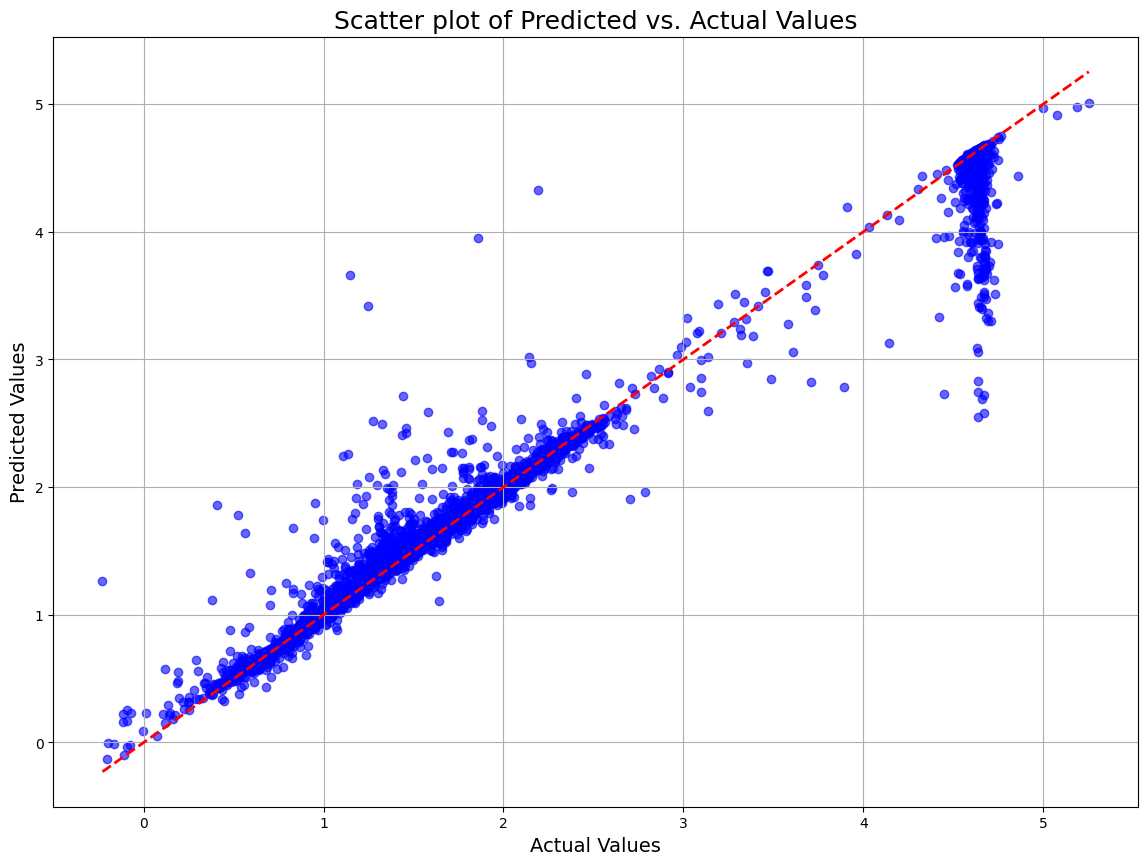

In [4]:
# Plot predicted vs actual with a line of slope 1
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         color='red', linestyle='--', linewidth=2)  # Line with slope of 1
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Scatter plot of Predicted vs. Actual Values', fontsize=18)
plt.grid(True)
plt.show()

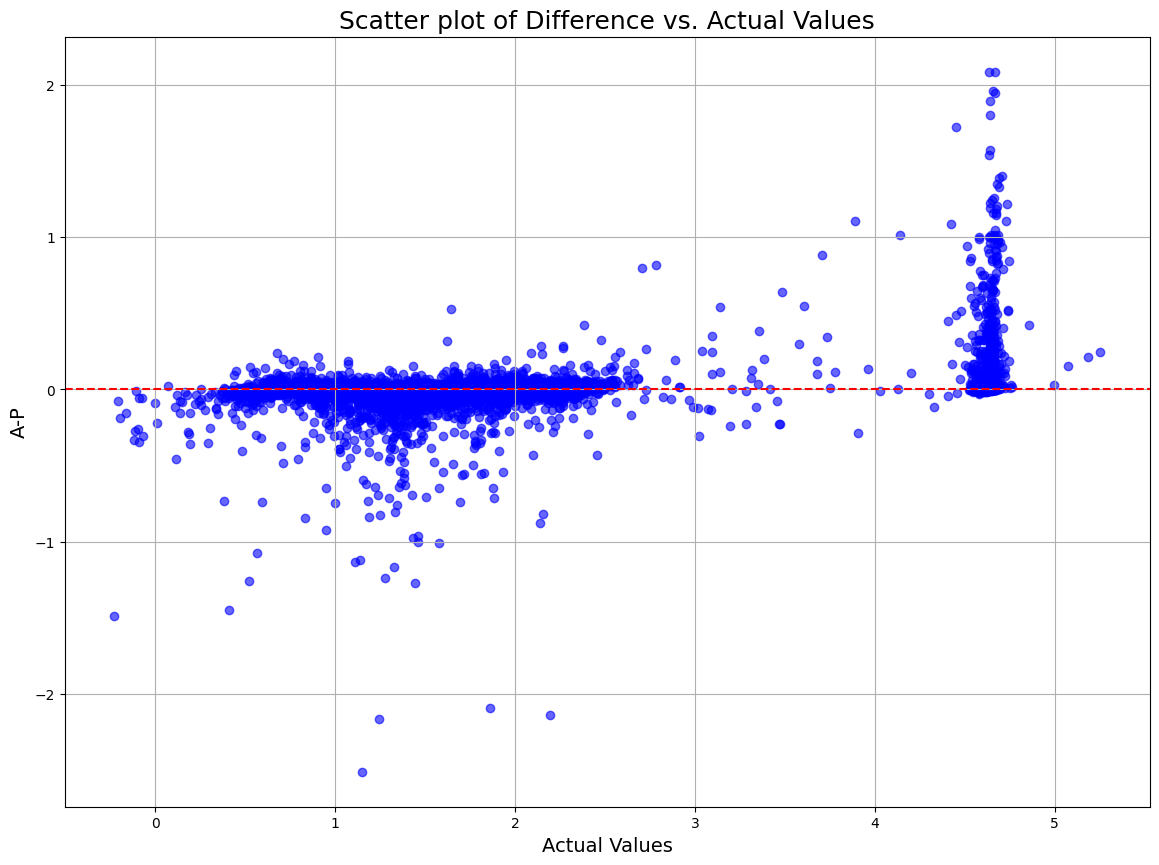

In [5]:
import matplotlib.pyplot as plt
# Plot actual vs. actual - predicted
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Difference'], color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('A-P', fontsize=14)
plt.title('Scatter plot of Difference vs. Actual Values', fontsize=18)
plt.grid(True)
plt.show()

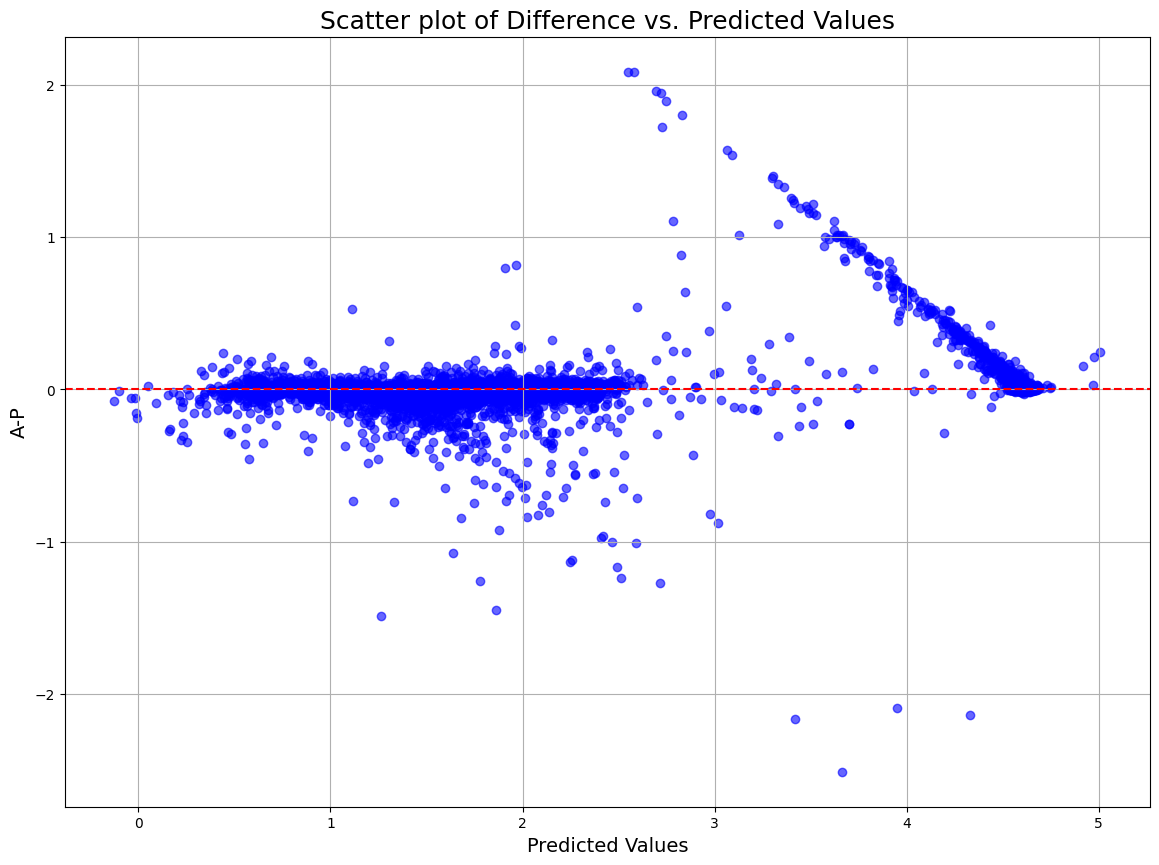

In [6]:
import matplotlib.pyplot as plt
# Plot actual vs. actual - predicted
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Predicted'], results_df['Difference'], color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('A-P', fontsize=14)
plt.title('Scatter plot of Difference vs. Predicted Values', fontsize=18)
plt.grid(True)
plt.show()

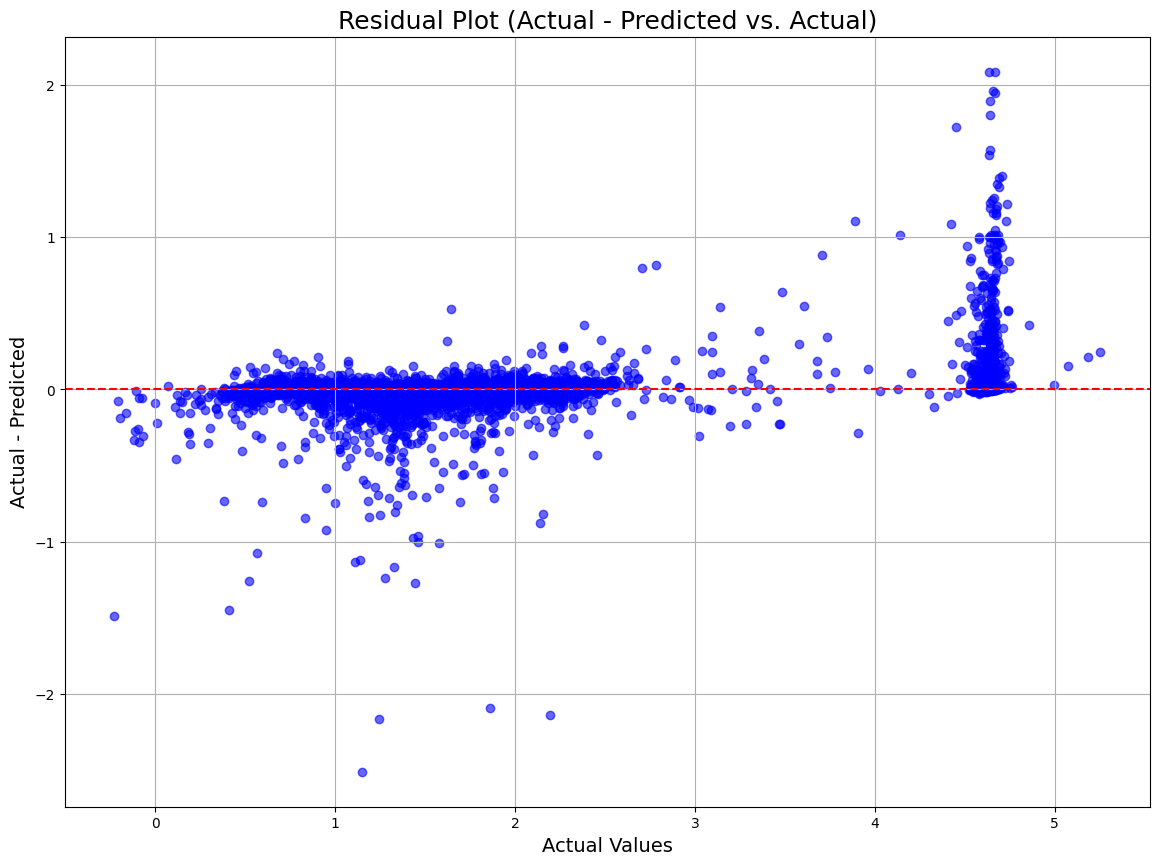

In [7]:
# Plot 1: Residual plot
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Difference'], color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Actual - Predicted', fontsize=14)
plt.title('Residual Plot (Actual - Predicted vs. Actual)', fontsize=18)
plt.grid(True)
plt.show()

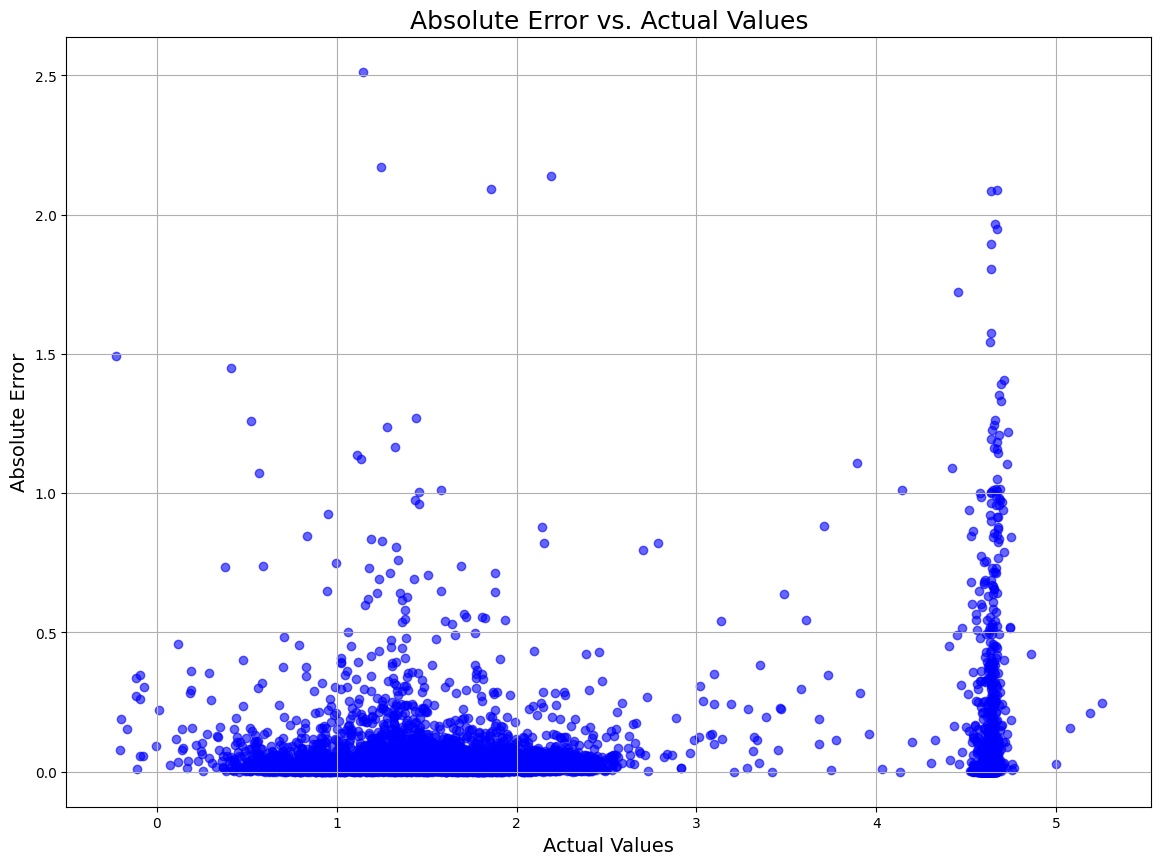

In [8]:
# Plot 2: Absolute Error plot
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Absolute Error'], color='blue', alpha=0.6)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Absolute Error', fontsize=14)
plt.title('Absolute Error vs. Actual Values', fontsize=18)
plt.grid(True)
plt.show()

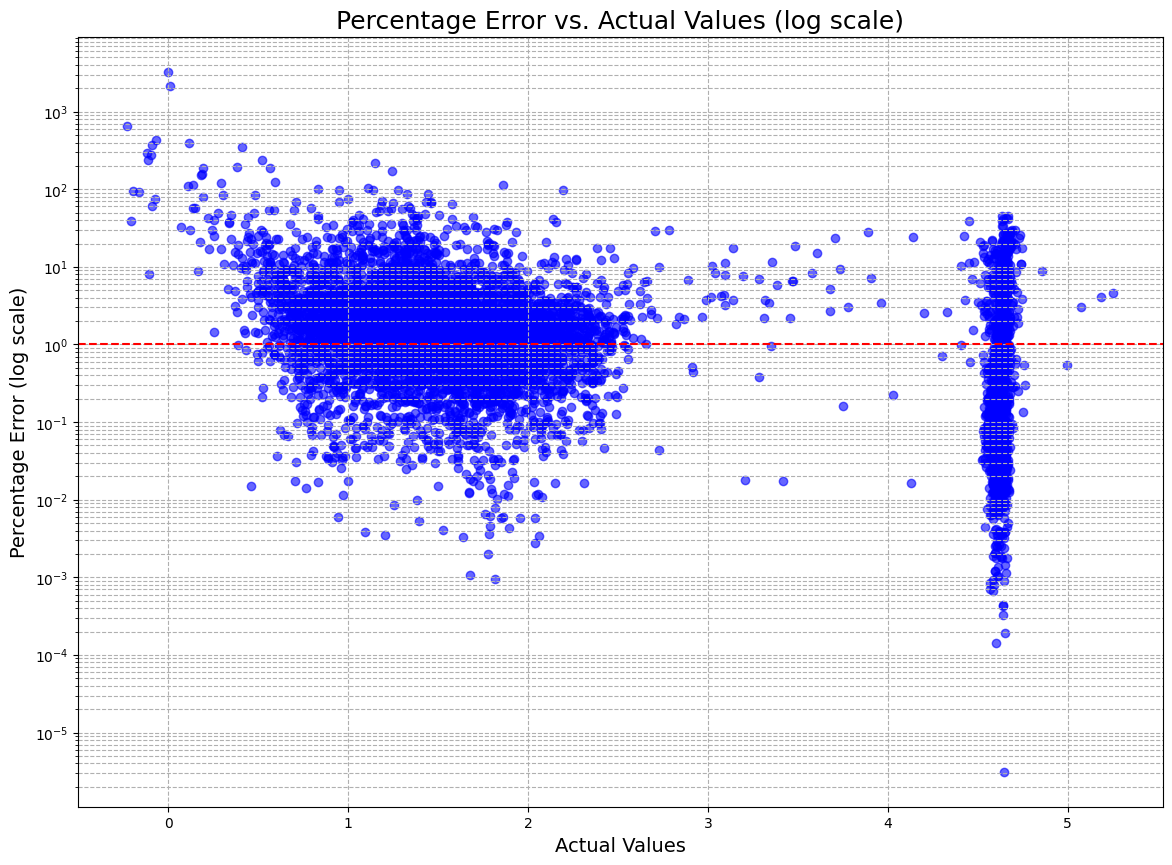

In [9]:
# Plot: Percentage Error plot on a log10 scale
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], np.abs(results_df['Percentage Error']), color='blue', alpha=0.6)
plt.yscale('log')
plt.axhline(1, color='red', linestyle='--')  # Add a horizontal line at y=1 for reference
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Percentage Error (log scale)', fontsize=14)
plt.title('Percentage Error vs. Actual Values (log scale)', fontsize=18)
plt.grid(True, which="both", ls="--")
plt.show()

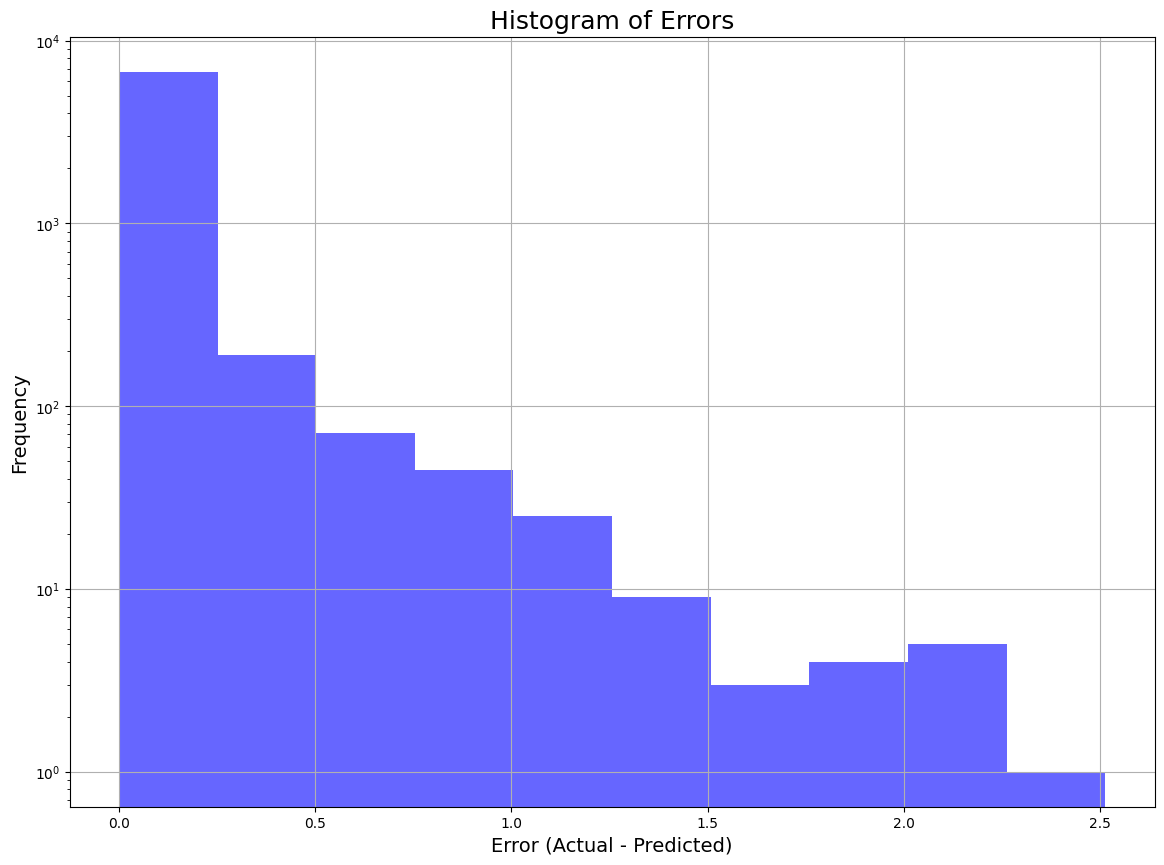

In [10]:
# Plot 4: Histogram of Errors
plt.figure(figsize=(14, 10))
plt.hist(results_df['Absolute Error'], bins=10, color='blue', alpha=0.6)
plt.xlabel('Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')
plt.title('Histogram of Errors', fontsize=18)
plt.grid(True)
plt.show()

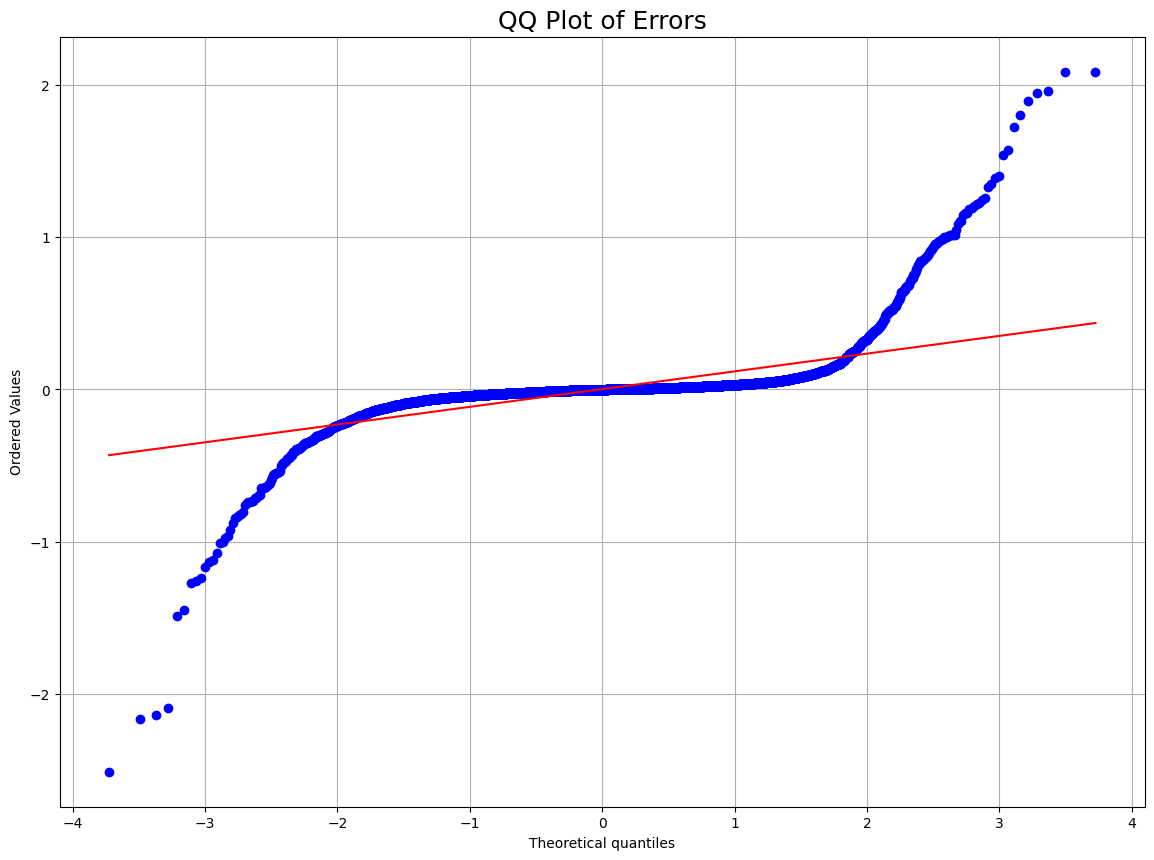

In [11]:
import scipy.stats as stats
plt.figure(figsize=(14, 10))
stats.probplot(results_df['Difference'], dist="norm", plot=plt)
plt.title('QQ Plot of Errors', fontsize=18)
plt.grid(True)
plt.show()

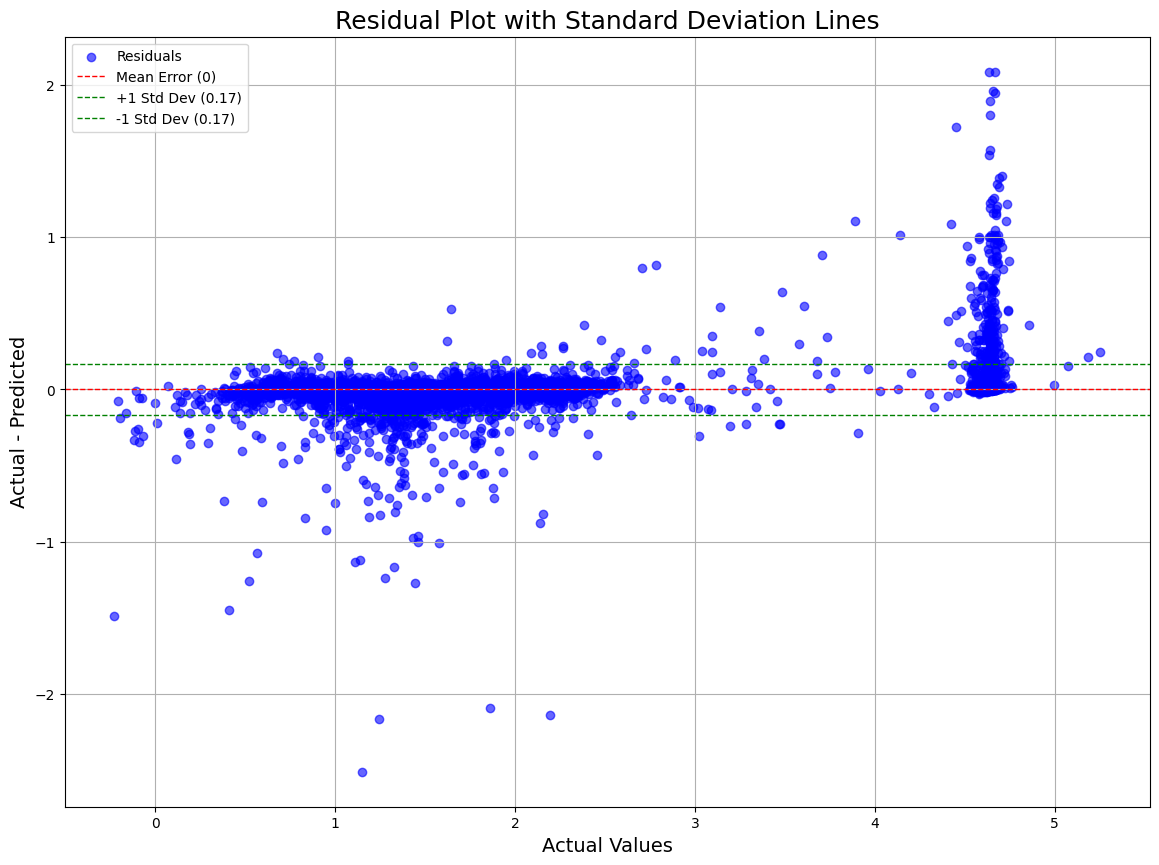

In [12]:
# Calculate the standard deviation of the residuals
std_dev = np.std(results_df['Difference'])

# Plot residuals with standard deviation lines
plt.figure(figsize=(14, 10))
plt.scatter(results_df['Actual'], results_df['Difference'], color='blue', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Mean Error (0)')
plt.axhline(std_dev, color='green', linestyle='--', linewidth=1, label=f'+1 Std Dev ({std_dev:.2f})')
plt.axhline(-std_dev, color='green', linestyle='--', linewidth=1, label=f'-1 Std Dev ({std_dev:.2f})')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Actual - Predicted', fontsize=14)
plt.title('Residual Plot with Standard Deviation Lines', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

In [38]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

# Define the updated list of colors in RGB format
colors = [
    (180, 130, 207),
    (141, 70, 185),
    (122, 35, 171), #2
    (90, 22, 150), #2
    (70, 15, 135), 
    (0, 0, 100), #6 - 100

    (75, 120, 235),
    (71, 114, 232),#11
    (63, 94, 230), #10
    (55, 74, 228), #9
    (46, 63, 226), #8
    (10, 56, 223), #12 - 200
    


#     (120, 197, 238),
#     (112, 188, 241),
#     (105, 175, 241),
#     (100, 169, 239), 
#     (97, 160, 239),    
#     (88, 150, 237), 


 # 300 
    
    (126, 255, 40),    
    (20, 240, 30), 
    (30, 231, 67),  
    (42, 222, 82), 
    (64, 202, 94), 
    (57, 168, 87), # 400
    

    



    #(182, 255, 0), 
    #(219, 255, 0), 
    (245, 252, 0), 
    (240, 230, 2),
    (240, 222, 10), 
    (235, 200, 15),  
    (225, 188, 0),
    (205, 161, 0), #500
    
  
    (255, 176, 0), 
    (255, 165, 0),
    (255,130,0),
    (255, 100, 100), 
    (255, 50, 50), 
    (255, 0, 0) # 600
]
print(len(colors))
# Normalize the RGB values to [0, 1] range
colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]

# Create a colormap object with the updated colors list
cmap = LinearSegmentedColormap.from_list("custom_gradient_with_brightened_color", colors, N=len(colors))

30


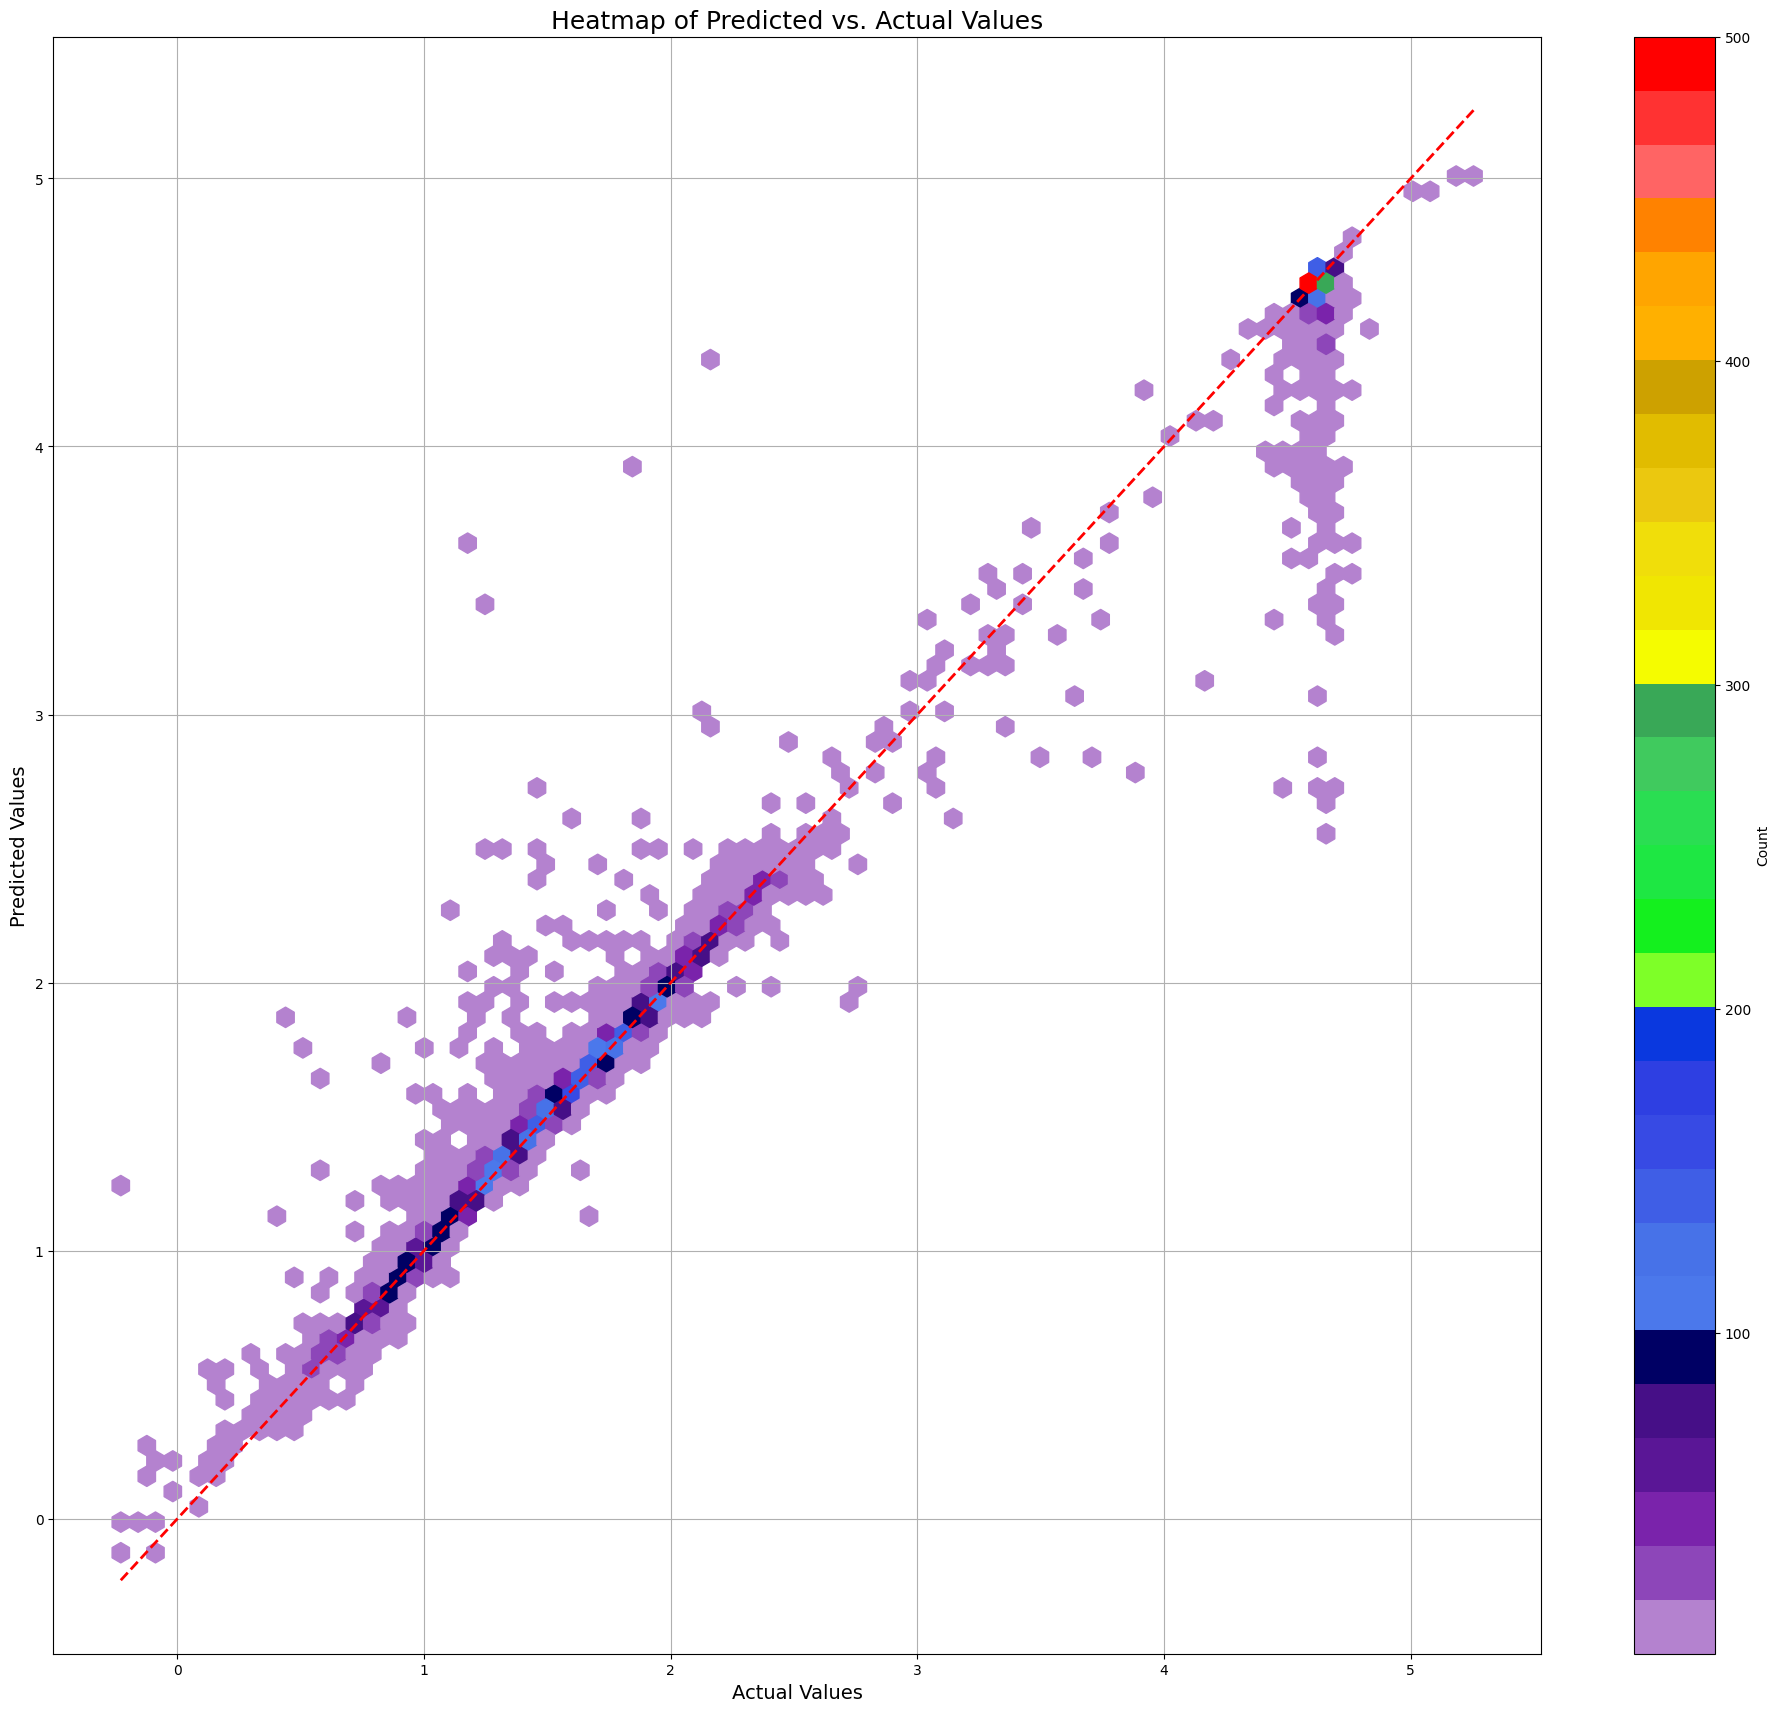

In [29]:
# Create a ListedColormap object
cmap = mcolors.ListedColormap(colors, name='my_rainbow')

cmap.set_under('white', alpha=0)  # Make values of zero transparent
cmap_args = dict(cmap=cmap, vmin=1, vmax=500)
plt.figure(figsize=(24, 21))
#plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', alpha=0.6)
plt.hexbin(results_df['Actual'], results_df['Predicted'], gridsize=78, **cmap_args)  # Using cmap_args for colormap setup
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
       [results_df['Actual'].min(), results_df['Actual'].max()],
        color='red', linestyle='--', linewidth=2)  # Line with slope of 1
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Heatmap of Predicted vs. Actual Values', fontsize=18)
plt.colorbar(label='Count')
plt.grid(True)
plt.show()

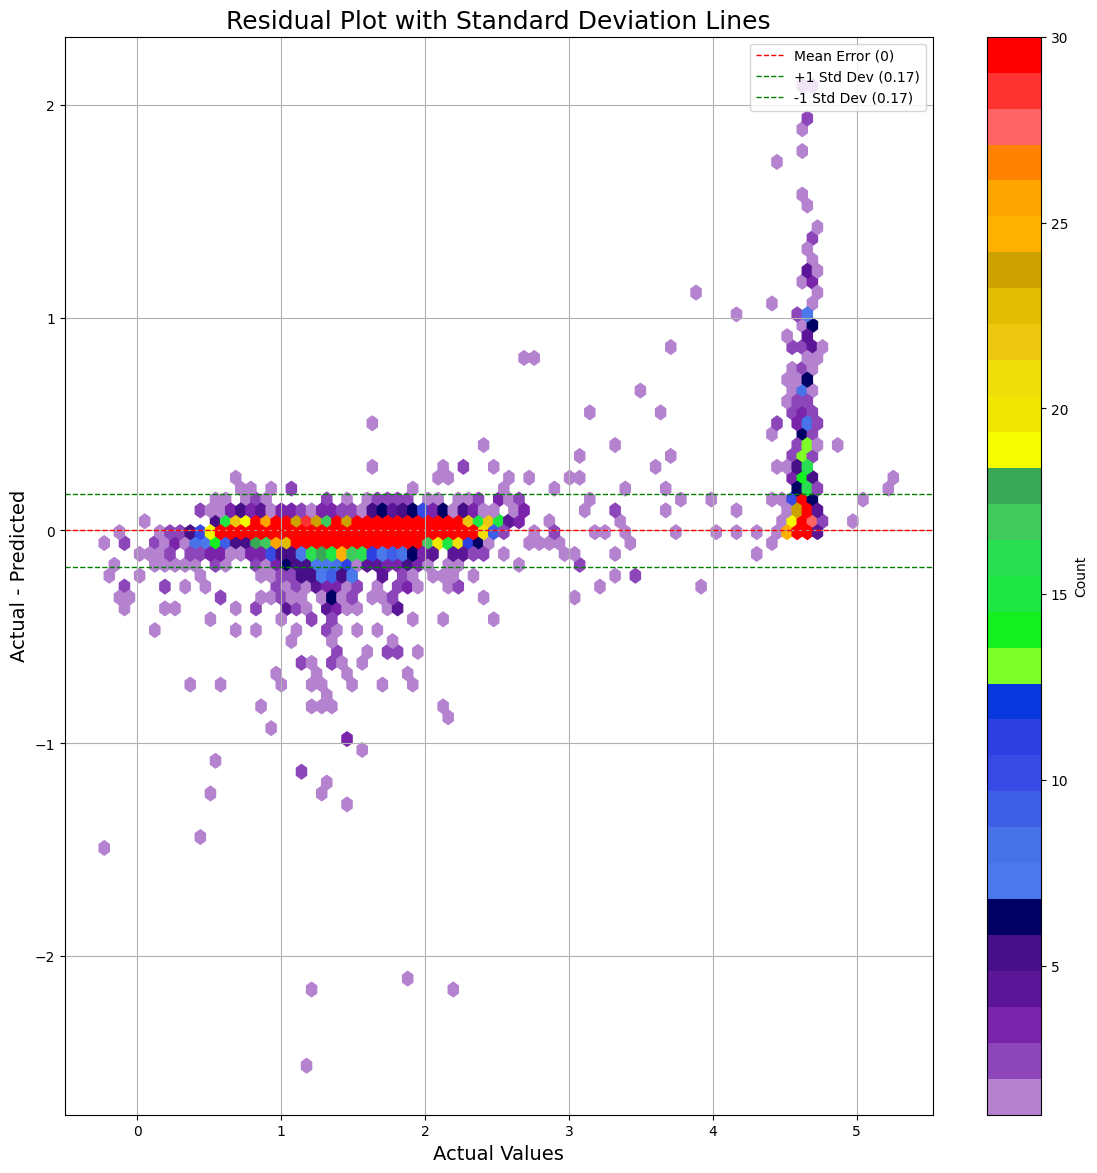

In [44]:
##### Create a ListedColormap object
cmap = mcolors.ListedColormap(colors, name='my_rainbow')

cmap.set_under('white', alpha=0)  # Make values of zero transparent
cmap_args = dict(cmap=cmap, vmin=1, vmax = 30)
plt.figure(figsize=(14, 14))
#plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', alpha=0.6)
plt.hexbin(results_df['Actual'], results_df['Difference'], gridsize=78, **cmap_args)  # Using cmap_args for colormap setup
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Mean Error (0)')
plt.axhline(std_dev, color='green', linestyle='--', linewidth=1, label=f'+1 Std Dev ({std_dev:.2f})')
plt.axhline(-std_dev, color='green', linestyle='--', linewidth=1, label=f'-1 Std Dev ({std_dev:.2f})')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Actual - Predicted', fontsize=14)
plt.title('Residual Plot with Standard Deviation Lines Heatmapping 1-30 objects', fontsize=18)
plt.legend()
plt.colorbar(label='Count')
plt.grid(True)
plt.show()

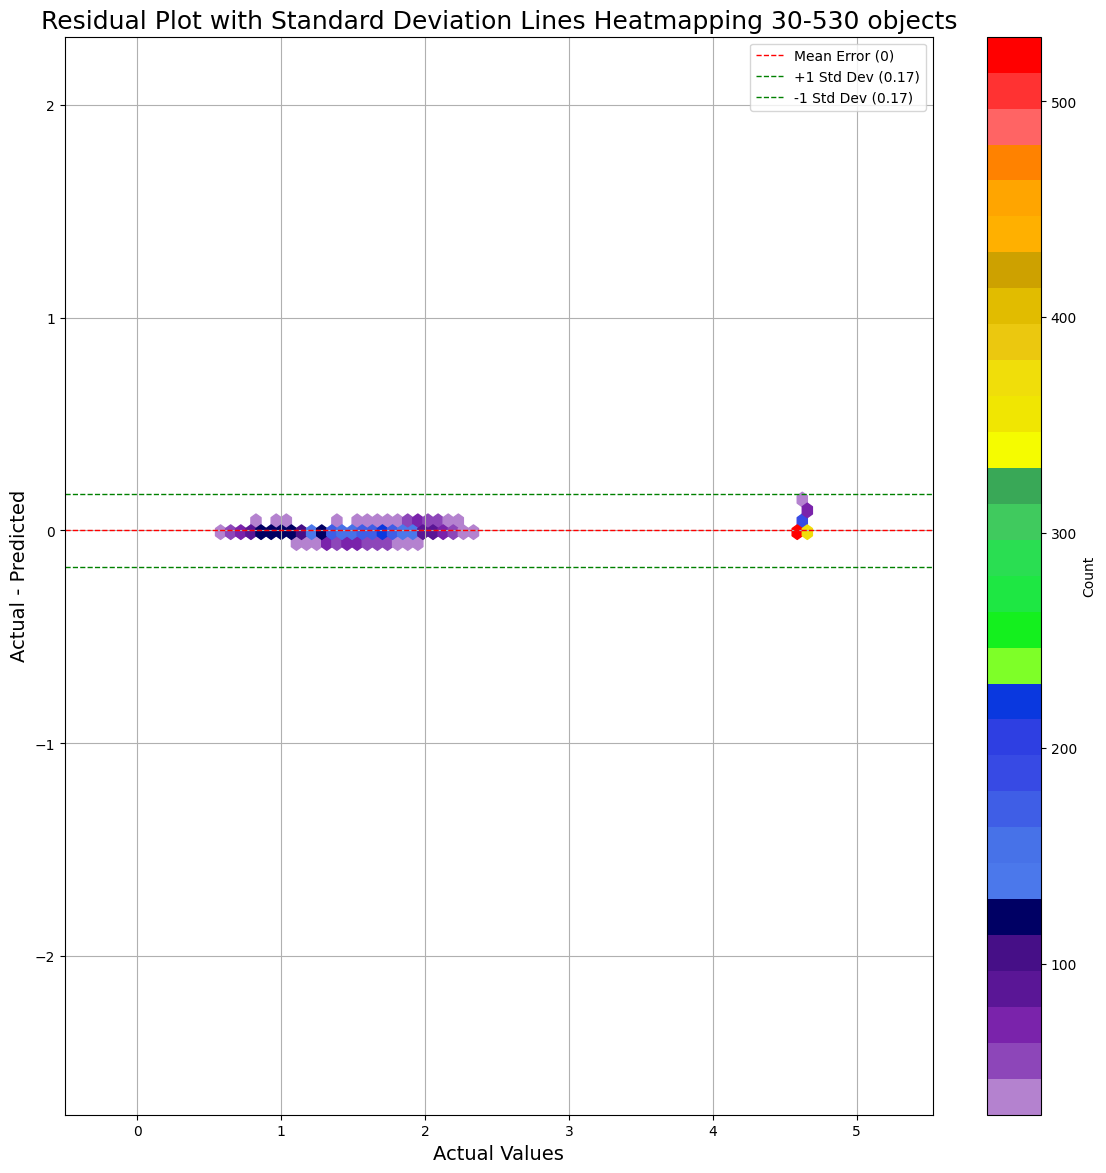

In [52]:
##### Create a ListedColormap object
cmap = mcolors.ListedColormap(colors, name='my_rainbow')

cmap.set_under('white', alpha=0)  # Make values of zero transparent
cmap_args = dict(cmap=cmap, vmin=30, vmax = 530)
plt.figure(figsize=(14, 14))
#plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', alpha=0.6)
plt.hexbin(results_df['Actual'], results_df['Difference'], gridsize=78, **cmap_args)  # Using cmap_args for colormap setup
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Mean Error (0)')
plt.axhline(std_dev, color='green', linestyle='--', linewidth=1, label=f'+1 Std Dev ({std_dev:.2f})')
plt.axhline(-std_dev, color='green', linestyle='--', linewidth=1, label=f'-1 Std Dev ({std_dev:.2f})')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Actual - Predicted', fontsize=14)
plt.title('Residual Plot with Standard Deviation Lines Heatmapping 30-530 objects', fontsize=18)
plt.legend()
plt.colorbar(label='Count')
plt.grid(True)
plt.show()

Mean Difference: 0.1006435604504037
Standard Deviation of Difference: 0.25373583185259424
Sigma Significance: 0.39664701558143256
Mean Squared Error: 0.07447004323651629
R^2 Score: -25.183836075355117


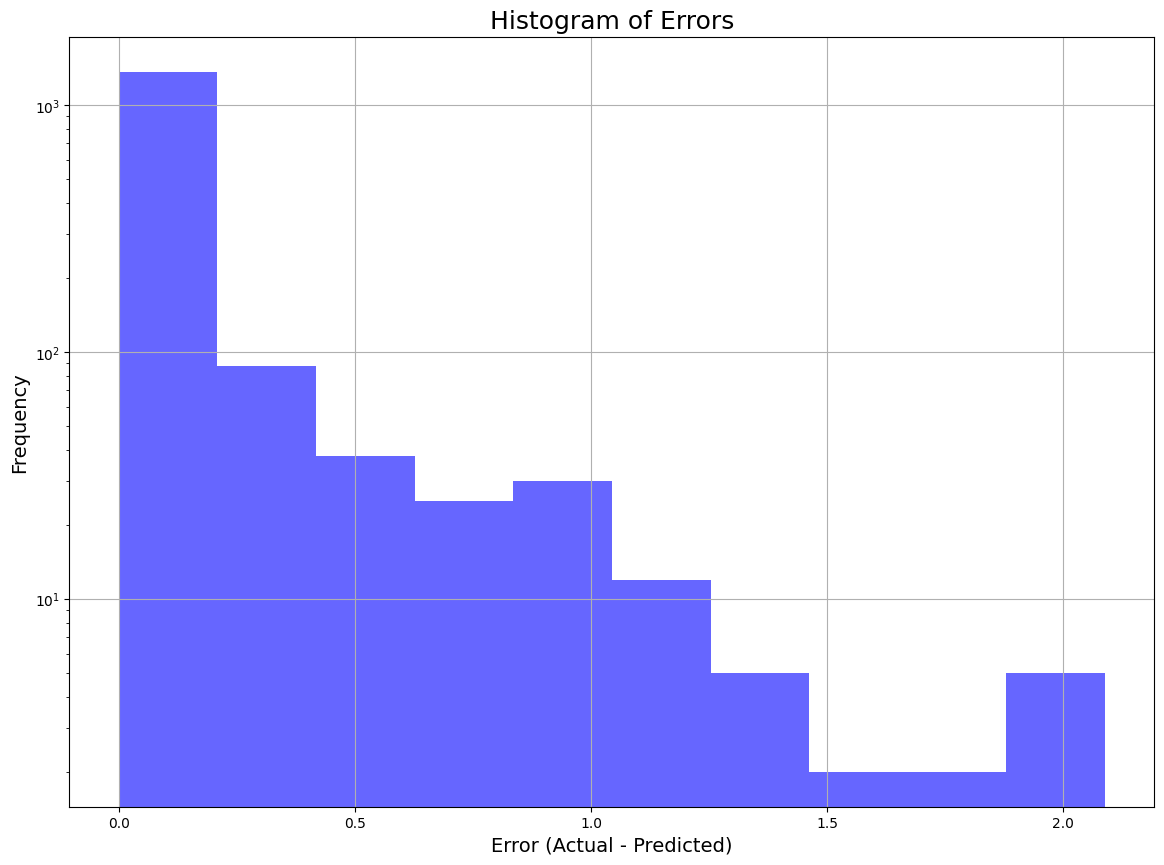

In [16]:
# Define the range of actual values for which you want to calculate sigma significance
min_actual_value = 4  # Replace with your minimum actual value
max_actual_value = results_df['Actual'].max()  # Replace with your maximum actual value

# Filter the results to include only the desired range of actual values
filteredResultsDF = results_df[(results_df['Actual'] >= min_actual_value) & (results_df['Actual'] <= max_actual_value)]

# Calculate the mean and standard deviation of the differences (residuals)
mean_difference = filteredResultsDF['Difference'].mean()
std_difference = filteredResultsDF['Difference'].std()

# Calculate sigma significance
sigma_significance = mean_difference / std_difference

print(f'Mean Difference: {mean_difference}')
print(f'Standard Deviation of Difference: {std_difference}')
print(f'Sigma Significance: {sigma_significance}')

mse = mean_squared_error(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])
r_squared = r2_score(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r_squared}')

plt.figure(figsize=(14, 10))
plt.hist(filteredResultsDF['Absolute Error'], bins=10, color='blue', alpha=0.6)
plt.xlabel('Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')
plt.title('Histogram of Errors', fontsize=18)
plt.grid(True)
plt.show()


Mean Difference: -0.025896390679058415
Standard Deviation of Difference: 0.12322936460373286
Sigma Significance: -0.21014788774033785
Mean Squared Error: 0.015853353333427928
R^2 Score: 0.9372712143122637


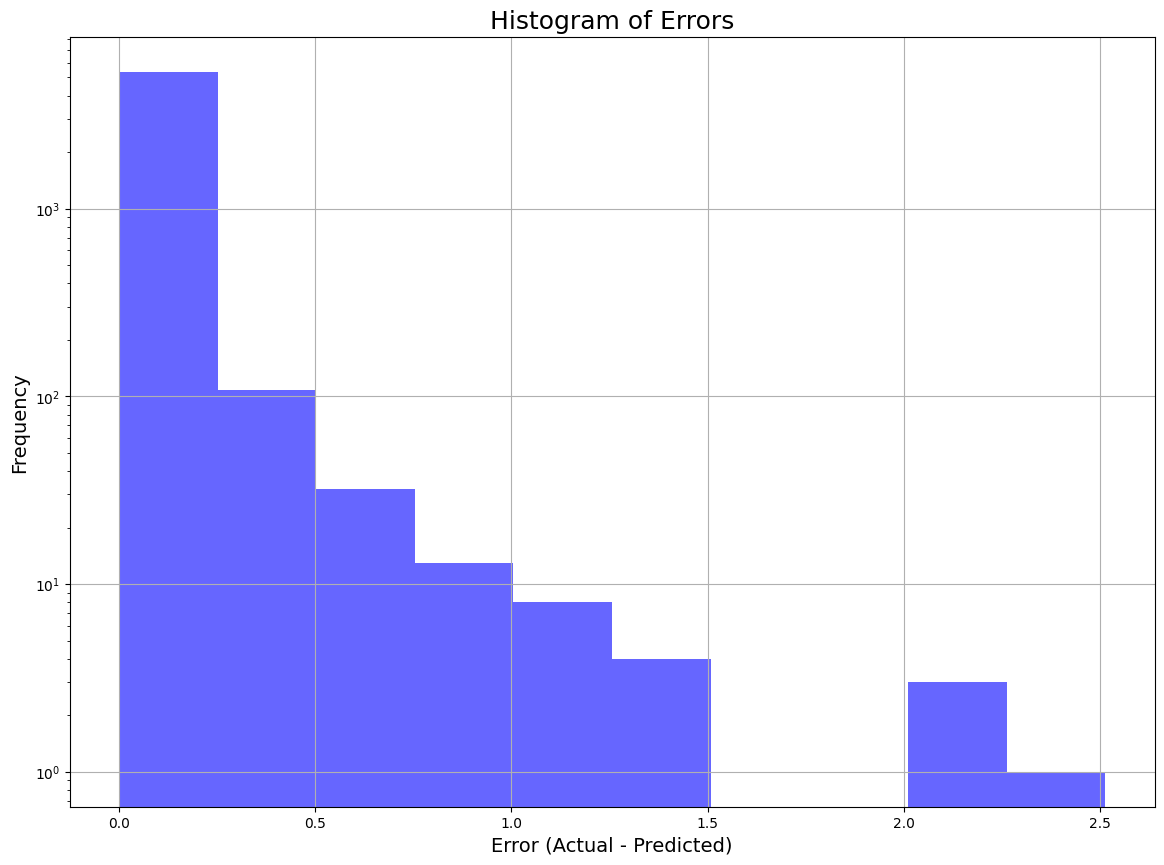

In [17]:
# Define the range of actual values for which you want to calculate sigma significance
min_actual_value = results_df['Actual'].min()
max_actual_value = 4 

# Filter the results to include only the desired range of actual values
filteredResultsDF = results_df[(results_df['Actual'] >= min_actual_value) & (results_df['Actual'] <= max_actual_value)]

# Calculate the mean and standard deviation of the differences (residuals)
mean_difference = filteredResultsDF['Difference'].mean()
std_difference = filteredResultsDF['Difference'].std()

# Calculate sigma significance
sigma_significance = mean_difference / std_difference

print(f'Mean Difference: {mean_difference}')
print(f'Standard Deviation of Difference: {std_difference}')
print(f'Sigma Significance: {sigma_significance}')

mse = mean_squared_error(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])
r_squared = r2_score(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r_squared}')
plt.figure(figsize=(14, 10))
plt.hist(filteredResultsDF['Absolute Error'], bins=10, color='blue', alpha=0.6)
plt.xlabel('Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')
plt.title('Histogram of Errors', fontsize=18)
plt.grid(True)
plt.show()

In [18]:
# Define the range of actual values for which you want to calculate sigma significance
min_actual_value =results_df['Actual'].min() # Replace with your minimum actual value
max_actual_value = results_df['Actual'].max() # Replace with your maximum actual value

# Filter the results to include only the desired range of actual values
filteredResultsDF = results_df[(results_df['Actual'] >= min_actual_value) & (results_df['Actual'] <= max_actual_value)]

# Calculate the mean and standard deviation of the differences (residuals)
mean_difference = filteredResultsDF['Difference'].mean()
std_difference = filteredResultsDF['Difference'].std()

# Calculate sigma significance
sigma_significance = mean_difference / std_difference

print(f'Mean Difference: {mean_difference}')
print(f'Standard Deviation of Difference: {std_difference}')
print(f'Sigma Significance: {sigma_significance}')

mse = mean_squared_error(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])
r_squared = r2_score(filteredResultsDF['Actual'], filteredResultsDF['Predicted'])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r_squared}')


Mean Difference: 0.0021127339584401062
Standard Deviation of Difference: 0.16978670279724326
Sigma Significance: 0.012443459491424965
Mean Squared Error: 0.028827929020228116
R^2 Score: 0.9846797562203148


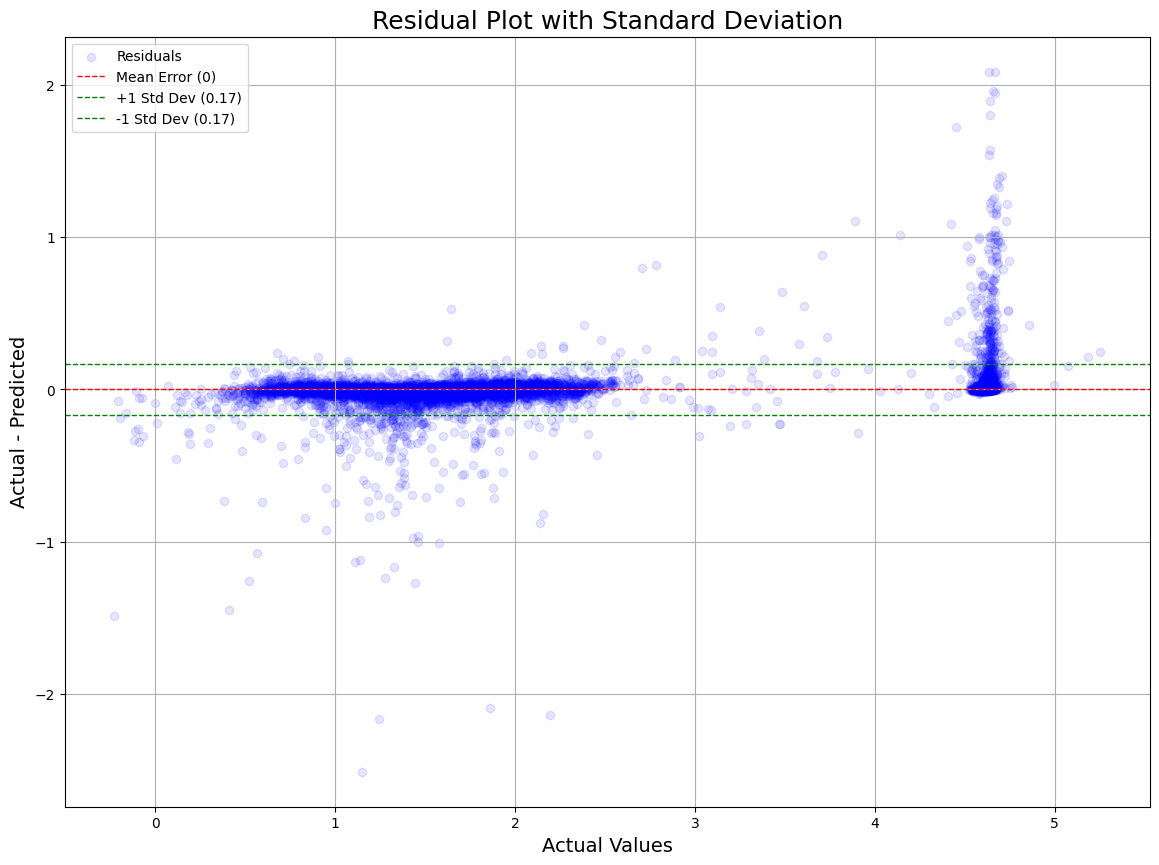

In [64]:
# Calculate the standard deviation of the residuals
std_dev = np.std(filteredResultsDF['Difference'])

# Plot residuals with standard deviation lines
plt.figure(figsize=(14, 10))
plt.scatter(filteredResultsDF['Actual'], filteredResultsDF['Difference'], color='blue', alpha=0.1, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Mean Error (0)')
plt.axhline(std_dev, color='green', linestyle='--', linewidth=1, label=f'+1 Std Dev ({std_dev:.2f})')
plt.axhline(-std_dev, color='green', linestyle='--', linewidth=1, label=f'-1 Std Dev ({std_dev:.2f})')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Actual - Predicted', fontsize=14)
plt.title('Residual Plot with Standard Deviation', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

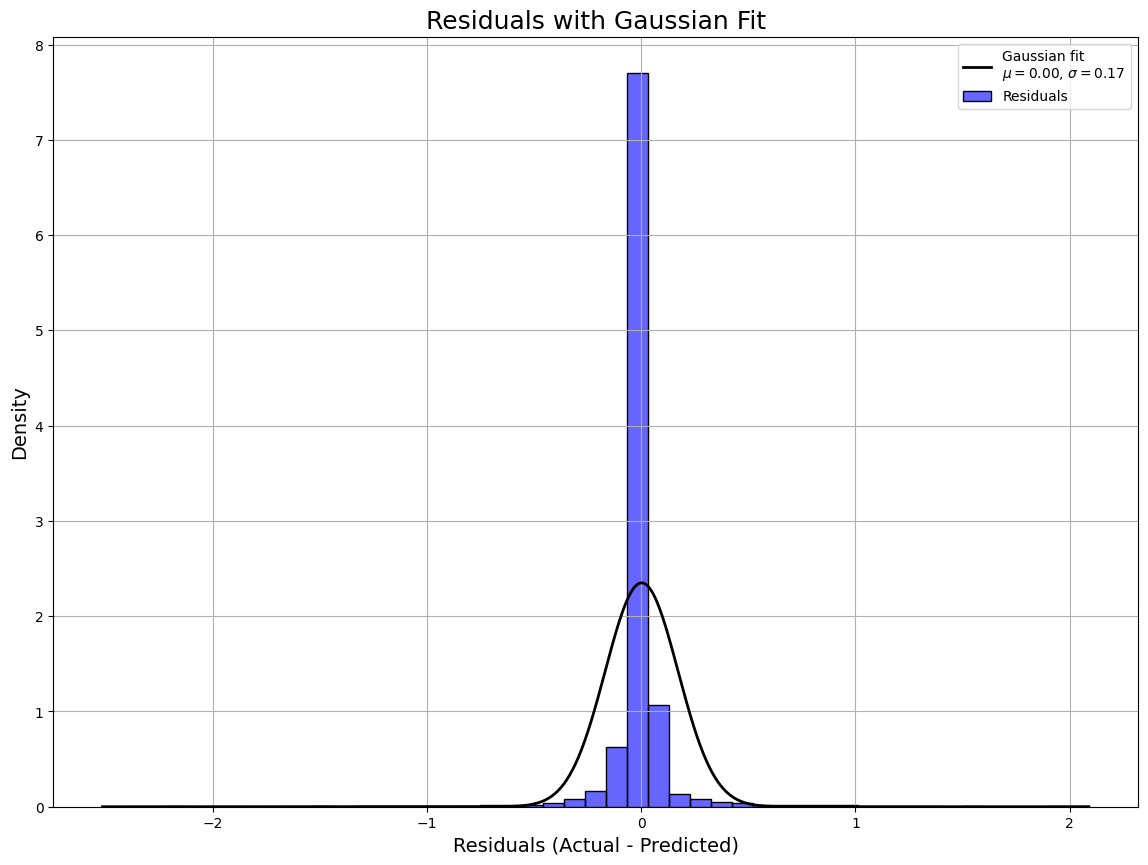

Mean of residuals: 0.0021127339584401062
Standard deviation of residuals: 0.16977474893354716


In [20]:
from scipy.stats import norm
import seaborn as sns
# Fit a Gaussian distribution to the residuals
(mu, sigma) = norm.fit(results_df['Difference'])

# Plot the histogram of the residuals
plt.figure(figsize=(14, 10))
sns.histplot(results_df['Difference'], bins=47, kde=False, stat='density', color='blue', alpha=0.6, label='Residuals')

# Plot the Gaussian fit
x = np.linspace(results_df['Difference'].min(), results_df['Difference'].max(), 1000)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label=f'Gaussian fit\n$\mu={mu:.2f}$, $\sigma={sigma:.2f}$')

# Add labels and title
plt.xlabel('Residuals (Actual - Predicted)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Residuals with Gaussian Fit', fontsize=18)
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Print the mean and standard deviation of the residuals
print(f'Mean of residuals: {mu}')
print(f'Standard deviation of residuals: {sigma}')

In [21]:
# Columns to use for training (excluding GAIA and most APOGEE data)
meta_columns = ['oid', 'filtercode', 'source_id_01', 'apogee_id_01']
training_columns = [col for col in data.columns if (col.startswith('FEETS_') or col in(['APOGEE_TEFF', 'APOGEE_FE_H','APOGEE_RV_TEFF', 'APOGEE_RV_FEH','APOGEE_TEFF_SPEC','APOGEE_FE'])) and (col not in ['FEETS_ra', 'FEETS_dec','ZTF_dist_x','ra','RA','dec','DEC','id','ID'] and col not in meta_columns)]

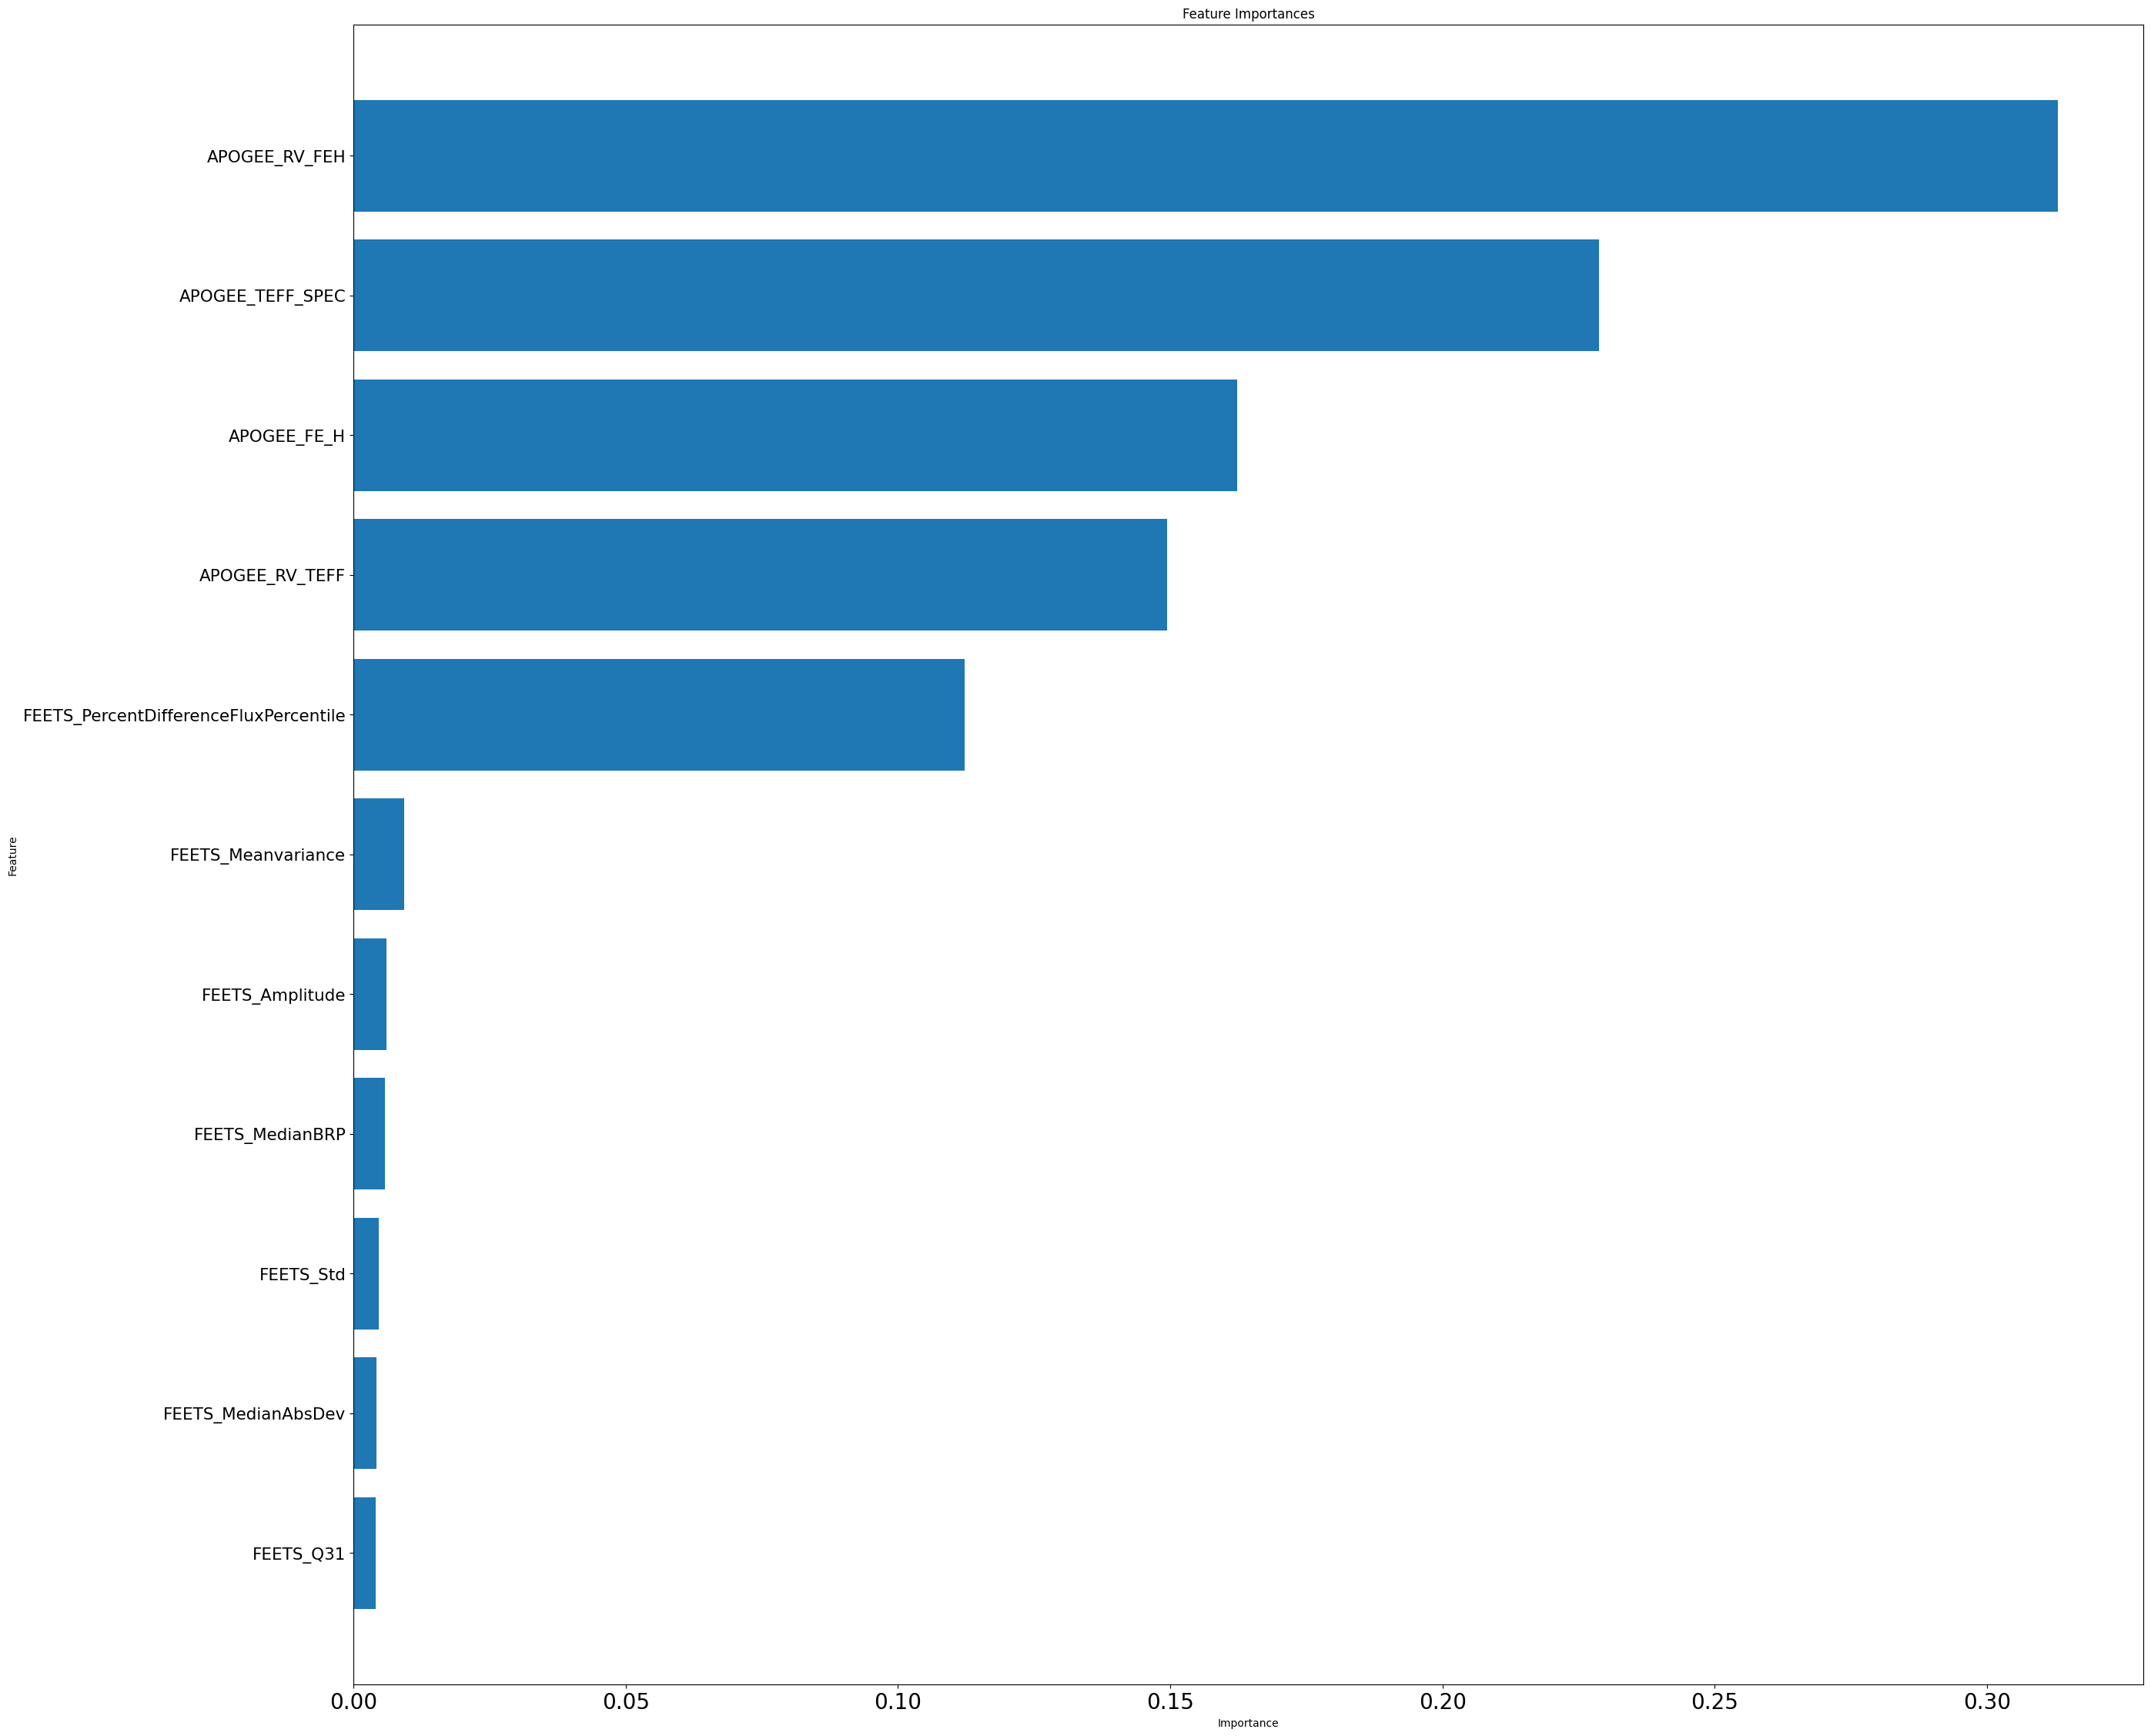

In [22]:
import os
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt

# Assuming the output directory, pipeline, and model are already defined and fitted

# Extract the indices of the selected features
selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Map the selected feature indices to the original column names
selected_feature_names = [training_columns[i] for i in selected_feature_indices]

# Get feature importances from the fitted model
feature_importances = rfr.feature_importances_

# Create a DataFrame using the original column names and their importances
importances_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# # Save feature importances to CSV
# importances_path = os.path.join(output_dir, 'feature_importances.csv')
# importances_df.to_csv(importances_path, index=False)

# Plot feature importances
plt.figure(figsize=(30, 28))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.yticks(fontsize=15.5)
plt.xticks(fontsize=20)
plt.title('Feature Importances')
plt.gca().invert_yaxis()

# # Save the plot
# plot_path = os.path.join(output_dir, 'feature_importances.png')
# plt.savefig(plot_path)
plt.show()
